In [83]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import glob

In [91]:
all_files = sorted(glob.glob('data/[0-9]*.csv'))


In [98]:
filename = all_files[2]
dates = ['Monday, 2019-02-08', 'Tuesday, 2019-02-09', 
             'Wednesday, 2019-02-10', 'Thursday, 2019-02-08',
             'Friday, 2019-02-08']
current_date = dates[2]
filename

'data/3_wednesday.csv'

Saving:  Wednesday, 2019-02-10


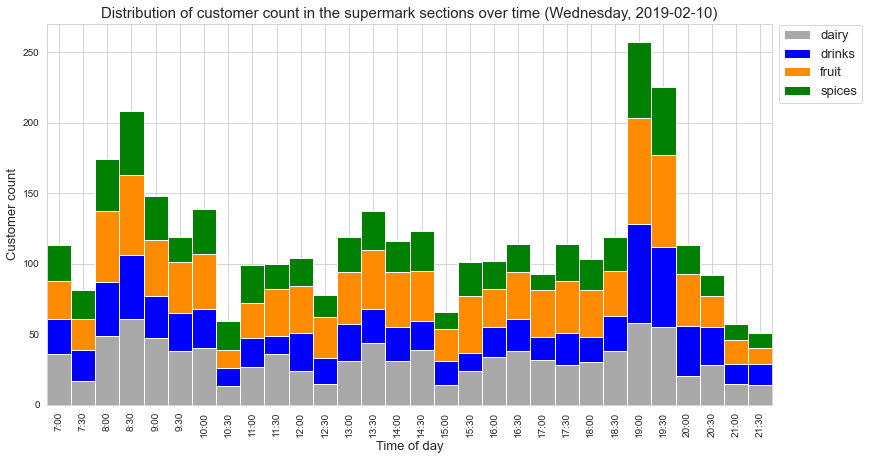

In [99]:
df = pd.read_csv(filename, index_col=None, sep= ';', header=0)

# create dummy column 
df['dummy']= 1

# create datetime index
df.timestamp = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

# create 4 different dataframes for the location and then stack on top of each other:
df_dairy = df[df.location == "dairy"]
df_drinks = df[df.location == "drinks"]
df_fruit = df[df.location == "fruit"]
df_spices = df[df.location == "spices"]

# groupby location    
df_dairy_plot = df_dairy.groupby('timestamp')[['dummy']].count().resample(rule='30MIN').sum().reset_index()
df_drinks_plot = df_drinks.groupby('timestamp')[['dummy']].count().resample(rule='30MIN').sum().reset_index()
df_fruit_plot = df_fruit.groupby('timestamp')[['dummy']].count().resample(rule='30MIN').sum().reset_index()
df_spices_plot = df_spices.groupby('timestamp')[['dummy']].count().resample(rule='30MIN').sum().reset_index()

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (13, 7)

# Values of each group
bars1 = list(df_dairy_plot.dummy)
bars2 = list(df_drinks_plot.dummy)
bars3 = list(df_fruit_plot.dummy)
bars4 = list(df_spices_plot.dummy)

# Bottoms
height_bars_1 = bars1
height_bars_1_2 = np.add(bars1, bars2).tolist()
height_bars_1_2_3 = np.add(height_bars_1_2, bars3).tolist()

# The position of the bars on the x-axis
xtick_pos = list(range(1,31))

# Names of group and bar width
barWidth = 1

labels = ['7:00', '7:30', '8:00', '8:30', '9:00', '9:30', '10:00', '10:30',
         '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30',
         '15:00', '15:30', '16:00', '16:30', '17:00', '17:30', '18:00', '18:30',
         '19:00', '19:30', '20:00', '20:30', '21:00', '21:30']

# Create bottom bars
plot_dairy = plt.bar(xtick_pos, bars1, 
                     color='darkgrey', width=barWidth, label='dairy')
# Create middle bars (1) , on top of the first ones
plot_drinks = plt.bar(xtick_pos, bars2, bottom=height_bars_1, 
                     color='blue', width=barWidth, label='drinks')
# Create middle bars (2) , on top of the second ones
plot_fruit = plt.bar(xtick_pos, bars3, bottom=height_bars_1_2, 
                      color='darkorange',width=barWidth, label='fruit')
# Create top bars , on top of the third ones
plot_spices = plt.bar(xtick_pos, bars4, bottom=height_bars_1_2_3, 
                      color='green', width=barWidth, label='spices')

# Custom X axis
plt.xticks(xtick_pos, labels, fontweight='normal',rotation=90)
plt.xlabel("Time of day", fontsize=13)
plt.ylabel('Customer count', fontsize=13)

plt.xlim(xmin=0.5, xmax=30.5)

plt.legend(handles=[plot_dairy, plot_drinks, plot_fruit, plot_spices], 
           bbox_to_anchor=(1.0, 1.015), loc='upper left', fontsize=13)

# create titles
print("Saving: ", current_date)
plt.title(f'Distribution of customer count in the supermark sections over time ({current_date})', fontsize=15)

#plt.show()
# save figure
plt.savefig(f'plots/cus_dist_in_sections_overtime_{current_date}.png', dpi=300)
    
